In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import spotify
import utils

sp = spotify.login(scope='playlist-modify-private')
user = sp.current_user()
username = user['id']
displayName = user['display_name']
displayName

'Mehmet Birgi'

In [5]:
playlist_id = 'spotify:user:mbirgi:playlist:7s9AjSciTfWIXcrBnYFaHm'
playlist = sp.user_playlist(username, playlist_id, fields="name, tracks, next")
playlist_name = playlist['name']
playlist_name

'145.0 BPM Blues'

In [6]:
tracks = []
audio_features = []
tracks_paging_object = playlist['tracks']
while True:
    track_id_list = []
    for item in tracks_paging_object['items']:
        track_result = item['track']
        track = {
            'id': track_result['id'],
            'name': track_result['name'],
            'artist_id': track_result['artists'][0]['id'],
            'artist_name': track_result['artists'][0]['name'],
            'popularity': track_result['popularity'],
        }
        tracks.append(track)
        track_id_list.append(track['id'])
    audio_features.extend(sp.audio_features(track_id_list))
    if not tracks_paging_object['next']:
        break
    tracks_paging_object = sp.next(tracks_paging_object)
print(len(tracks), "tracks in playlist")
print(len(audio_features), "tracks in audio_features")

20 tracks in playlist
20 tracks in audio_features


In [7]:
tracks_df = pd.DataFrame(tracks)
audio_features_df = pd.DataFrame(audio_features)

df = tracks_df.merge(audio_features_df, on='id')
df = df.drop(columns=['analysis_url', 'track_href', 'type', 'uri'])
df.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,31.950000,0.711300,0.500945,5.050000,-10.75710,0.700000,0.056995,0.574235,0.197045,0.180315,0.697900,140.006400,196590.700000,4.050000
std,22.390024,0.061225,0.202163,3.872644,4.07455,0.470162,0.037958,0.263681,0.356133,0.179998,0.217541,7.886822,40621.248659,0.223607
min,0.000000,0.596000,0.089900,0.000000,-19.97200,0.000000,0.027300,0.090600,0.000000,0.030800,0.288000,132.014000,119536.000000,4.000000
25%,18.750000,0.667000,0.357500,1.000000,-12.86050,0.000000,0.036675,0.395250,0.000006,0.089700,0.539500,134.140500,166808.750000,4.000000
50%,31.500000,0.694500,0.492500,6.000000,-9.77700,1.000000,0.043300,0.662500,0.002886,0.105500,0.729000,137.155000,184960.000000,4.000000
75%,49.000000,0.763750,0.637250,9.000000,-8.29650,1.000000,0.056900,0.779500,0.115825,0.201250,0.889750,146.002250,227279.750000,4.000000
max,74.000000,0.825000,0.858000,10.000000,-5.84200,1.000000,0.167000,0.862000,0.949000,0.836000,0.962000,158.000000,262120.000000,5.000000


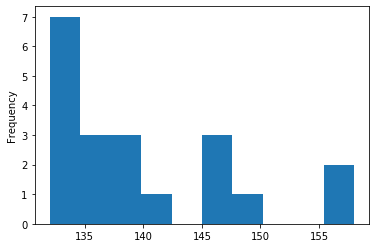

In [8]:
df['tempo'].plot.hist()

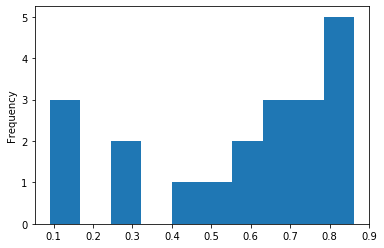

In [9]:
df['acousticness'].plot.hist()

# Get all my public playlists

In [10]:
sp_response = sp.current_user_playlists()
all_playlists = sp_response['items']
while sp_response['next']:
    sp_response = sp.next(sp_response)
    all_playlists.extend(sp_response['items'])
len(all_playlists)

72

In [11]:
own_playlists = list(filter(lambda l: l['owner']['id'] == user['id'], all_playlists))
len(own_playlists)

48

In [12]:
own_playlists_trimmed = [{k: v for k, v in d.items() if k in ['id', 'name', 'public', 'tracks']} for d in own_playlists]
len(own_playlists_trimmed)

48

In [13]:
public_playlists = list(filter(lambda l: (l['public'] == True), own_playlists_trimmed))
len(public_playlists)

17

In [14]:
public_playlists

[{'id': '6u5RL72VpPaJfeLksVLE2Q',
  'name': 'Mellow Jazz',
  'public': True,
  'tracks': {'href': 'https://api.spotify.com/v1/playlists/6u5RL72VpPaJfeLksVLE2Q/tracks',
   'total': 712}},
 {'id': '7JYdgqlBBhiCqjpx2pVKwf',
  'name': 'KJAH',
  'public': True,
  'tracks': {'href': 'https://api.spotify.com/v1/playlists/7JYdgqlBBhiCqjpx2pVKwf/tracks',
   'total': 1610}},
 {'id': '4jdHBhEw9a9OBJ0CVbmpFX',
  'name': 'Run',
  'public': True,
  'tracks': {'href': 'https://api.spotify.com/v1/playlists/4jdHBhEw9a9OBJ0CVbmpFX/tracks',
   'total': 68}},
 {'id': '2MzQi9D9OtFuUsuOS8lwtS',
  'name': 'Power Songs',
  'public': True,
  'tracks': {'href': 'https://api.spotify.com/v1/playlists/2MzQi9D9OtFuUsuOS8lwtS/tracks',
   'total': 925}},
 {'id': '5ngdqzXvg3v6yakZ6oAcxv',
  'name': 'Trojan Archives',
  'public': True,
  'tracks': {'href': 'https://api.spotify.com/v1/playlists/5ngdqzXvg3v6yakZ6oAcxv/tracks',
   'total': 749}},
 {'id': '566s1zzyRtF4bzv9JfpnVY',
  'name': 'Pop2000',
  'public': True,
  '